# DWT vs LPT

In [ ]:
import urllib.request
import cv2
import numpy as np
import pywt
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Input lena.
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]

In [4]:
# Compute 1-iteration 2D-DWT of lena.
wavelet = "bior1.3"
LL, (LH, HL, HH) = pywt.dwt2(Y, wavelet, mode="per")

Original (512, 512)
LL (approximation) (256, 256)
LH (horizontal details) (256, 256)
HL (vertical details) (256, 256)
HH (diagonal details) (256, 256)


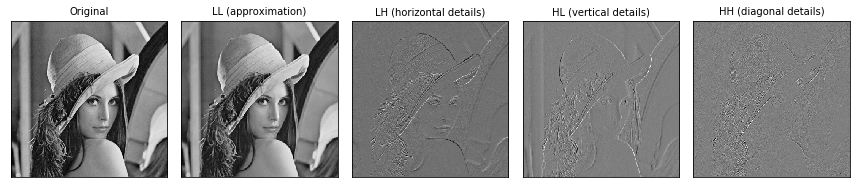

In [13]:
# Show the original image and the DWT subbands.
titles = ["Original", "LL (approximation)", "LH (horizontal details)",
          "HL (vertical details)", "HH (diagonal details)"]
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([Y, LL, LH, HL, HH]):
    print(titles[i], a.shape)
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [6]:
# Compute the inverse 1-iterations 2D-DWTof lena using only the
# high frequency subbands. LL=0.
H1_expanded = pywt.idwt2((None, (LH, HL, HH)), wavelet, mode='per') # Base of the LPT

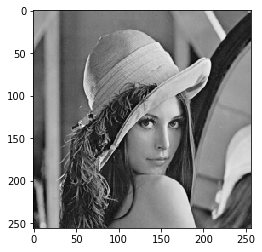

In [11]:
# Show the second level of the pyramid.
plt.imshow(LL, cmap="gray")

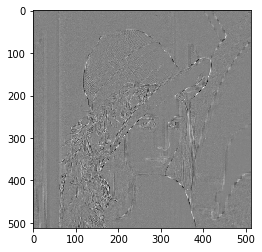

In [12]:
# Show the first level of the pyramid.
plt.imshow(H1_expanded, cmap="gray")